In [1]:
data = read.csv("college.csv", header=TRUE, sep=",")

In [2]:
head(data)

Rank Major_code Major                                     Total Men   Women
1 1    2419       PETROLEUM ENGINEERING                      2339  2057   282
2 2    2416       MINING AND MINERAL ENGINEERING              756   679    77
3 3    2415       METALLURGICAL ENGINEERING                   856   725   131
4 4    2417       NAVAL ARCHITECTURE AND MARINE ENGINEERING  1258  1123   135
5 5    2405       CHEMICAL ENGINEERING                      32260 21239 11021
6 6    2418       NUCLEAR ENGINEERING                        2573  2200   373
  Major_category ShareWomen Sample_size Employed ⋯ Part_time
1 Engineering    0.1205643   36          1976    ⋯  270     
2 Engineering    0.1018519    7           640    ⋯  170     
3 Engineering    0.1530374    3           648    ⋯  133     
4 Engineering    0.1073132   16           758    ⋯  150     
5 Engineering    0.3416305  289         25694    ⋯ 5180     
6 Engineering    0.1449670   17          1857    ⋯  264     
  Full_time_year_round Unemployed Unemployment_rate Median P25th P75th 
1  1207                  37       0.01838053        110000 95000 125000
2   388                  85       0.11724138         75000 55000  90000
3   340                  16       0.02409639         73000 50000 105000
4   692                  40       0.05012531         70000 43000  80000
5 16697                1672       0.06109771         65000 50000  75000
6  1449                 400       0.17722641         65000 50000 102000
  College_jobs Non_college_jobs Low_wage_jobs
1  1534         364             193          
2   350         257              50          
3   456         176               0          
4   529         102               0          
5 18314        4440             972          
6  1142         657             244

In [102]:
require(ggplot2)
require(tidyverse)
require(corrplot)
require(ggthemes)

Loading required package: ggthemes



In [15]:
data$category = str_trim(data$Major_category)

In [5]:
# data$category = as.factor(data$Major_category)
# data = sapply(data, unclass)

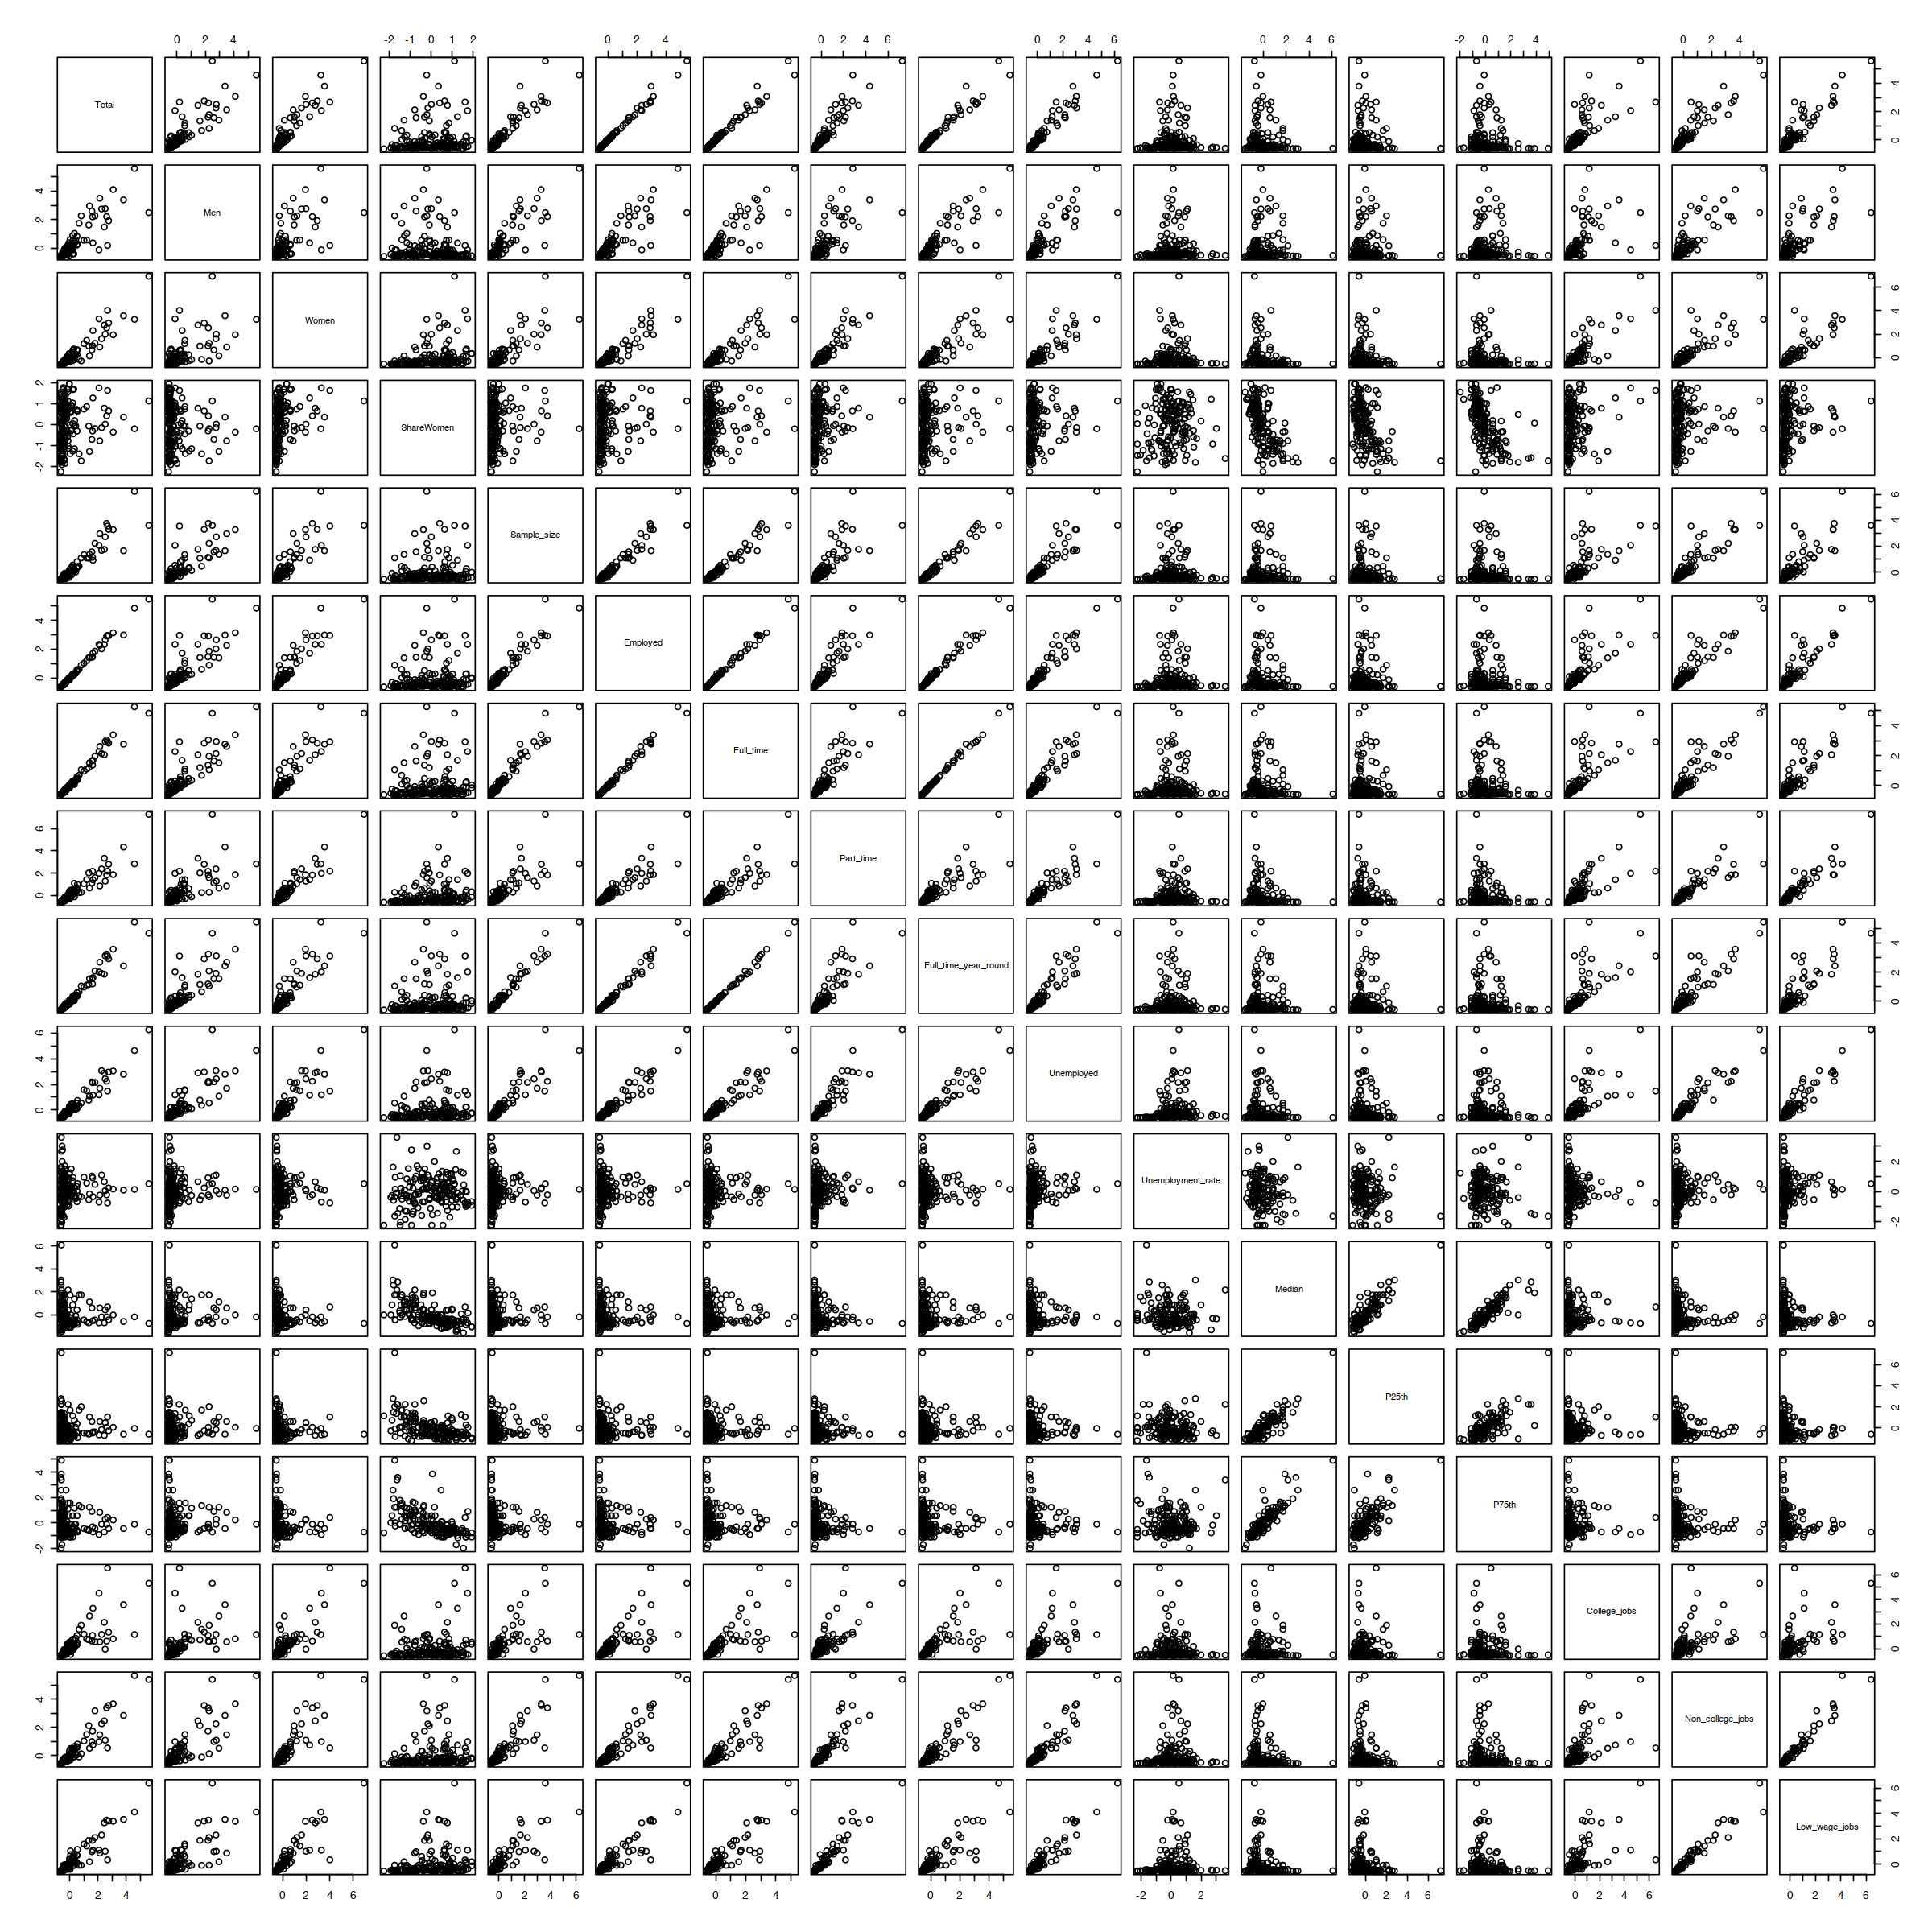

In [6]:
options(repr.plot.width=20, repr.plot.height=20)
only_numeric = data[-c(1, 2, 3, 7)]
pairs(scale(only_numeric))

In [16]:
data

Rank Major_code Major                                         Total  Men  
1    1   2419       PETROLEUM ENGINEERING                           2339  2057
2    2   2416       MINING AND MINERAL ENGINEERING                   756   679
3    3   2415       METALLURGICAL ENGINEERING                        856   725
4    4   2417       NAVAL ARCHITECTURE AND MARINE ENGINEERING       1258  1123
5    5   2405       CHEMICAL ENGINEERING                           32260 21239
6    6   2418       NUCLEAR ENGINEERING                             2573  2200
7    7   6202       ACTUARIAL SCIENCE                               3777  2110
8    8   5001       ASTRONOMY AND ASTROPHYSICS                      1792   832
9    9   2414       MECHANICAL ENGINEERING                         91227 80320
10  10   2408       ELECTRICAL ENGINEERING                         81527 65511
11  11   2407       COMPUTER ENGINEERING                           41542 33258
12  12   2401       AEROSPACE ENGINEERING                          15058 12953
13  13   2404       BIOMEDICAL ENGINEERING                         14955  8407
14  14   5008       MATERIALS SCIENCE                               4279  2949
15  15   2409       ENGINEERING MECHANICS PHYSICS AND SCIENCE       4321  3526
16  16   2402       BIOLOGICAL ENGINEERING                          8925  6062
17  17   2412       INDUSTRIAL AND MANUFACTURING ENGINEERING       18968 12453
18  18   2400       GENERAL ENGINEERING                            61152 45683
19  19   2403       ARCHITECTURAL ENGINEERING                       2825  1835
20  20   3201       COURT REPORTING                                 1148   877
21  21   2102       COMPUTER SCIENCE                              128319 99743
22  22   1104       FOOD SCIENCE                                      NA    NA
23  23   2502       ELECTRICAL ENGINEERING TECHNOLOGY              11565  8181
24  24   2413       MATERIALS ENGINEERING AND MATERIALS SCIENCE     2993  2020
25  25   6212       MANAGEMENT INFORMATION SYSTEMS AND STATISTICS  18713 13496
26  26   2406       CIVIL ENGINEERING                              53153 41081
27  27   5601       CONSTRUCTION SERVICES                          18498 16820
28  28   6204       OPERATIONS LOGISTICS AND E-COMMERCE            11732  7921
29  29   2499       MISCELLANEOUS ENGINEERING                       9133  7398
30  30   5402       PUBLIC POLICY                                   5978  2639
⋮   ⋮    ⋮          ⋮                                             ⋮      ⋮    
144 144  1105       PLANT SCIENCE AND AGRONOMY                      7416  4897
145 145  2308       SCIENCE AND COMPUTER TEACHER EDUCATION          6483  2049
146 146  5200       PSYCHOLOGY                                    393735 86648
147 147  6002       MUSIC                                          60633 29909
148 148  2306       PHYSICAL AND HEALTH EDUCATION TEACHING         28213 15670
149 149  6006       ART HISTORY AND CRITICISM                      21030  3240
150 150  6000       FINE ARTS                                      74440 24786
151 151  2901       FAMILY AND CONSUMER SCIENCES                   58001  5166
152 152  5404       SOCIAL WORK                                    53552  5137
153 153  1103       ANIMAL SCIENCES                                21573  5347
154 154  6003       VISUAL AND PERFORMING ARTS                     16250  4133
155 155  2312       TEACHER EDUCATION: MULTIPLE LEVELS             14443  2734
156 156  5299       MISCELLANEOUS PSYCHOLOGY                        9628  1936
157 157  5403       HUMAN SERVICES AND COMMUNITY ORGANIZATION       9374   885
158 158  3402       HUMANITIES                                      6652  2013
159 159  4901       THEOLOGY AND RELIGIOUS VOCATIONS               30207 18616
160 160  6007       STUDIO ARTS                                    16977  4754
161 161  2201       COSMETOLOGY SERVICES AND CULINARY ARTS         10510  4364
162 162  1199       MISCELLANEOUS AGRICULTURE         

In [39]:
grouped_data = data[-c(1, 2, 3, 7)] %>% 
    group_by(category) %>% 
    summarise_all(mean) %>% 
    mutate(across(where(is.character), str_trim)) %>%
    mutate(across(where(is.numeric), scale)) %>%
    drop_na()

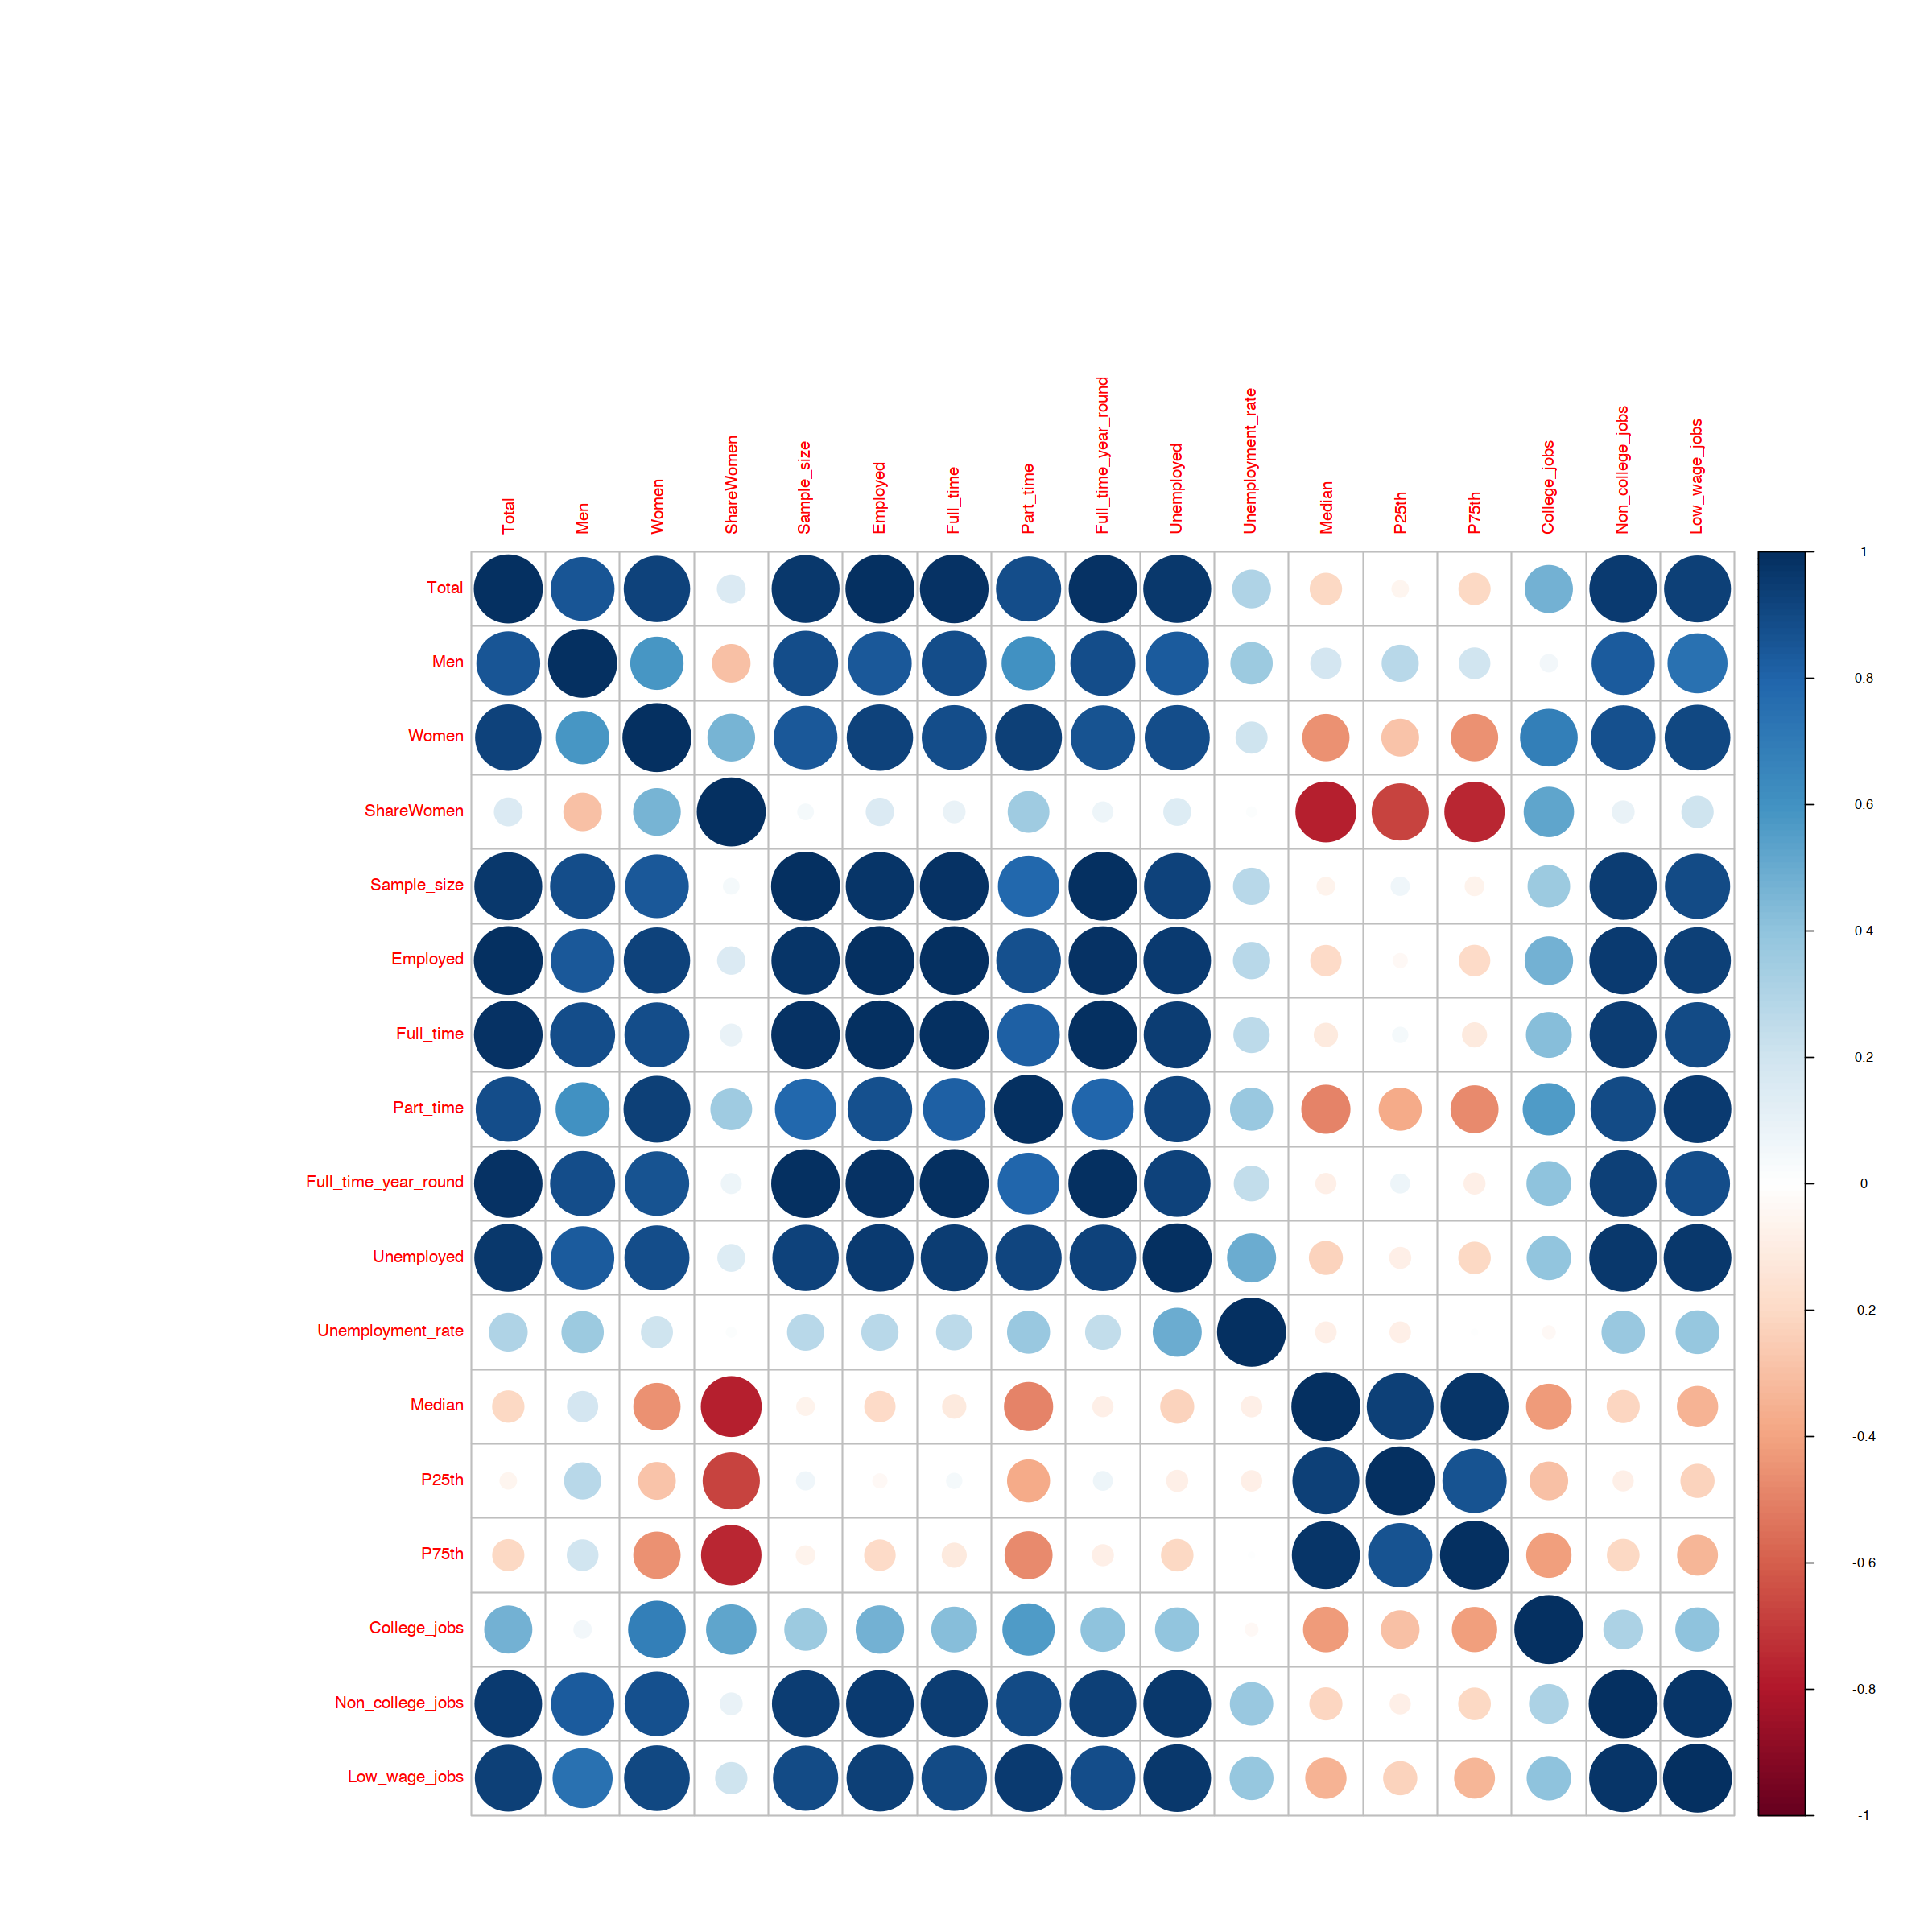

In [41]:
corrplot(cor(grouped_data[2:ncol(grouped_data)]))

In [47]:
D <- dist(grouped_data[2:nrow(grouped_data)])
D_mat <- as.matrix(D)

In [48]:
D_mat

1         2        3         4         5        6        7         8       
1  0.0000000 2.996685  7.244138  6.037548 4.112034 3.431687  7.735131 2.804043
2  2.9966847 0.000000  8.272204  7.809476 3.046357 1.912361  5.926637 1.896319
3  7.2441384 8.272204  0.000000  3.473404 8.087985 8.316324  9.559944 7.738307
4  6.0375483 7.809476  3.473404  0.000000 8.520123 7.410497 10.840351 6.938501
5  4.1120343 3.046357  8.087985  8.520123 0.000000 4.703354  4.116677 3.944056
6  3.4316869 1.912361  8.316324  7.410497 4.703354 0.000000  7.298101 1.897236
7  7.7351313 5.926637  9.559944 10.840351 4.116677 7.298101  0.000000 6.581711
8  2.8040434 1.896319  7.738307  6.938501 3.944056 1.897236  6.581711 0.000000
9  0.7921331 2.650215  7.085037  5.879154 4.228833 2.874810  7.687918 2.486490
10 3.7057168 1.722006  7.929232  7.709584 3.208943 2.682247  5.813442 3.095541
11 4.0663502 2.247044 10.011622  9.396727 4.014750 2.747649  6.698885 2.828953
12 3.4088464 3.040138  7.017998  7.303215 1.803743 4.281784  4.671866 3.279343
13 5.0173342 2.327226  9.240059  9.364995 2.978058 3.641913  4.463555 3.381693
14 2.2572752 3.369890  7.117432  5.446044 5.466160 2.654367  8.447315 2.536020
15 2.4061703 4.068605  5.334409  4.948577 4.033660 4.667958  7.087685 3.755462
   9         10       11        12       13       14       15      
1  0.7921331 3.705717  4.066350 3.408846 5.017334 2.257275 2.406170
2  2.6502150 1.722006  2.247044 3.040138 2.327226 3.369890 4.068605
3  7.0850369 7.929232 10.011622 7.017998 9.240059 7.117432 5.334409
4  5.8791541 7.709584  9.396727 7.303215 9.364995 5.446044 4.948577
5  4.2288326 3.208943  4.014750 1.803743 2.978058 5.466160 4.033660
6  2.8748104 2.682247  2.747649 4.281784 3.641913 2.654367 4.667958
7  7.6879178 5.813442  6.698885 4.671866 4.463555 8.447315 7.087685
8  2.4864899 3.095541  2.828953 3.279343 3.381693 2.536020 3.755462
9  0.0000000 3.347437  3.942304 3.477591 4.802429 1.693124 2.491408
10 3.3474370 0.000000  3.600203 3.555112 2.565423 4.099857 4.461471
11 3.9423040 3.600203  0.000000 4.145279 3.063227 4.479089 5.506978
12 3.4775912 3.555112  4.145279 0.000000 3.736480 4.459852 2.763084
13 4.8024289 2.565423  3.063227 3.736480 0.000000 5.481488 5.629350
14 1.6931243 4.099857  4.479089 4.459852 5.481488 0.000000 3.345720
15 2.4914080 4.461471  5.506978 2.763084 5.629350 3.345720 0.000000

In [50]:
# Minimum distance between two species
min_dist <- min(D_mat[which(D_mat > 0)])
# Find indices of minimum element in distance matrix
which_min <- which(D_mat == min_dist, arr.ind = TRUE)

min_dist

[1] 0.7921331

In [54]:
# Maximum distance between two species
max_dist <- max(D_mat)
# Find indices of maximum element in distance matrix
which_max <- which(D_mat == max_dist, arr.ind = TRUE)

max_dist

[1] 10.84035

In [55]:
which_max

row col
7 7   4  
4 4   7

In [53]:
grouped_data$category[1]
grouped_data$category[9]

[1] "Arts"

[1] "Humanities & Liberal Arts"

In [56]:
grouped_data$category[7]
grouped_data$category[4]

[1] "Engineering"

[1] "Communications & Journalism"

In [60]:
dimensions = cmdscale(D, k=2)

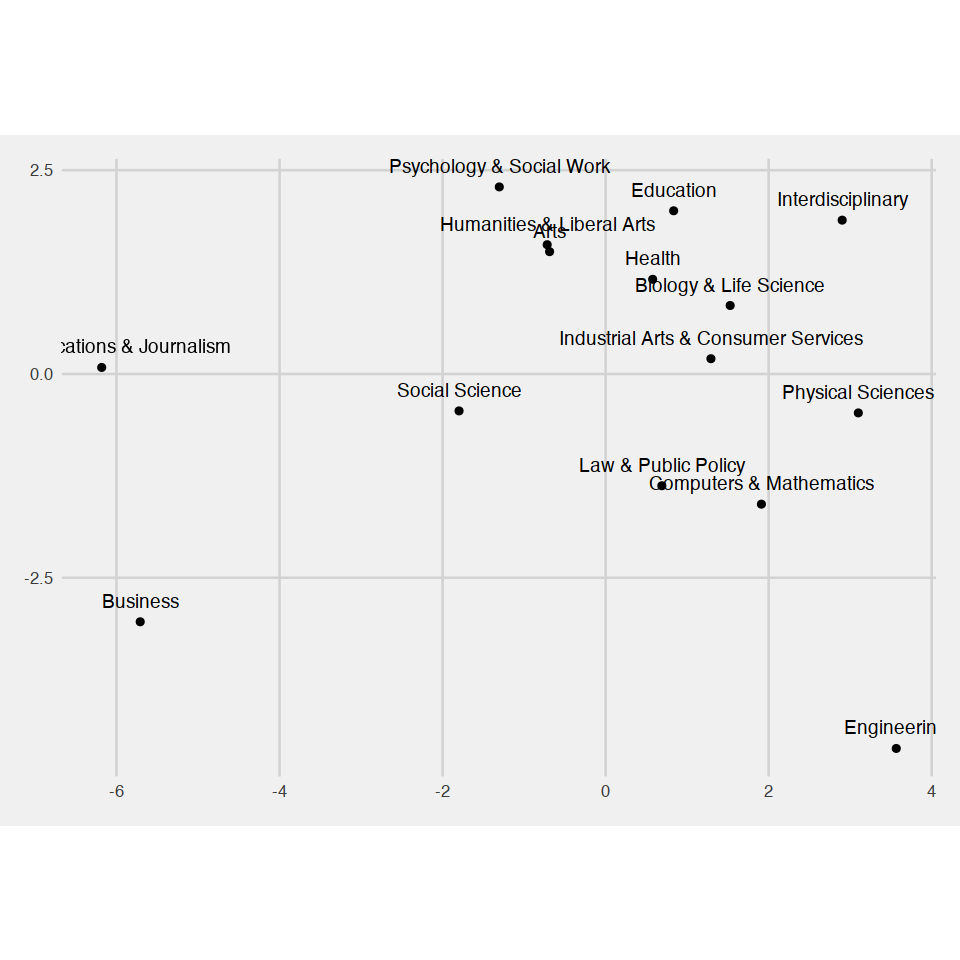

In [108]:
dimensions = cmdscale(D, k=2)
options(repr.plot.width=8, repr.plot.height=8)
result = data.frame(
    Category = str_trim(grouped_data$category), 
    V1 = dimensions[, 1],
    V2 = dimensions[, 2]
)

ggplot(data=result, aes(x=V1, y=V2, label=Category)) + 
    geom_point() + 
    geom_text(aes(label=Category),vjust=-1, hjust=0.5) + 
    theme_fivethirtyeight(base_size = 12, base_family = "sans") + coord_fixed()

In [109]:
dimensions = cmdscale(D, k=3)

In [111]:
as.data.frame(dimensions)

V1         V2          V3        
1  -0.6874134  1.50000086 -1.4142778
2   1.5280064  0.83952519  0.3858046
3  -5.7092904 -3.04020777  0.8960989
4  -6.1817883  0.07955272  0.5225767
5   1.9108798 -1.59759102 -1.1873808
6   0.8343371  2.00164992  1.3701582
7   3.5653152 -4.59405380  0.3093147
8   0.5771194  1.16113204  0.4826866
9  -0.7168818  1.58556577 -0.7771809
10  1.2916634  0.18675849  1.1388471
11  2.9018273  1.88651926 -0.2351599
12  0.6893347 -1.37144647 -1.2398000
13  3.0996427 -0.47803915  1.1265393
14 -1.3045140  2.29414884  0.1374547
15 -1.7982383 -0.45351489 -1.5156814

In [117]:
df = as.data.frame(dimensions)
df$category = grouped_data$category

In [121]:
require(plotly)

Loading required package: plotly

Warning message:
“package ‘plotly’ was built under R version 4.1.1”

Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




In [125]:
t <- list(
  family = "sans serif",
  size = 14,
  color = toRGB("grey50")
)

fig = plot_ly(data=df, x=~V1, y=~V2, z=~V3, color=~category, text=~category)
fig = fig %>% add_markers()
fig = fig %>% add_text(textfont = t, textposition = "top right")

fig

Warning message in RColorBrewer::brewer.pal(N, "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message in RColorBrewer::brewer.pal(N, "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message in RColorBrewer::brewer.pal(N, "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message in RColorBrewer::brewer.pal(N, "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”


HTML widgets cannot be represented in plain text (need html)